# 10 Sklearn Features I Sincerely Hope You Learn After Using It For a Year
## TODO
![](images/pexels.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@psco?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pineapple Supply Co.</a>
        on 
        <a href='https://www.pexels.com/photo/photo-of-three-pineapples-surrounded-by-balloons-1071882/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a>
    </strong>
</figcaption>

# Setup

In [14]:
import logging
import time
import warnings

import catboost as cb
import datatable as dt
import joblib
import lightgbm as lgbm
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.compose import (
    ColumnTransformer,
    make_column_selector,
    make_column_transformer,
)
from sklearn.impute import SimpleImputer
from sklearn.metrics import log_loss, mean_squared_error
from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer

logging.basicConfig(
    format="%(asctime)s - %(message)s", datefmt="%d-%b-%y %H:%M:%S", level=logging.INFO
)
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore")
pd.set_option("float_format", "{:.5f}".format)

In [18]:
from sklearn.datasets import *

X, y = make_regression(n_samples=1000000, n_features=10)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, random_state=1121218, test_size=0.2
)

# Introduction

# 1. FunctionTransformer

### 💻Demo

In [8]:
from sklearn.preprocessing import FunctionTransformer


def reduce_memory(X, y=None):
    # Write your logic here...
    pass


ReduceMemoryTransformer = FunctionTransformer(reduce_memory)

### 📚Documentation
**FunctionTransformer** - [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer)

# 2. BaseEstimator and TransformerMixin

### 💻Demo

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer


class CustomLogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._estimator = PowerTransformer()

    def fit(self, X, y=None):
        X_copy = np.copy(X) + 1
        self._estimator.fit(X_copy)

        return self

    def transform(self, X):
        X_copy = np.copy(X) + 1

        return self._estimator.transform(X_copy)

    def inverse_transform(self, X):
        X_reversed = self._estimator.inverse_transform(np.copy(X))

        return X_reversed - 1

### 📚Documentation
**BaseEstimator** - [link](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html#sklearn.base.BaseEstimator).

**TransformerMixin** - [link](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html).

https://towardsdatascience.com/how-to-write-powerful-code-others-admire-with-custom-sklearn-transformers-34bc9087fdd?source=your_stories_page-------------------------------------

# 3. TransformedTargetRegressor

### 💻Demo

In [17]:
reg = lgbm.LGBMRegressor()

final_estimator = TransformedTargetRegressor(
    regressor=reg, transformer=CustomLogTransformer()
)

final_estimator.fit(X_train, y_train)

TransformedTargetRegressor(regressor=LGBMRegressor(),
                           transformer=CustomLogTransformer())

### 📚Documentation

**TransformedTargetregressor** - [link](https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html#sklearn.compose.TransformedTargetRegressor).

# 4. QuadraticDiscriminantAnalysis

![](https://miro.medium.com/proxy/1*utS0gTpSfjYPAJHCwuFGcg.png)

### 💻Demo

In [20]:
%%time

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X, y = make_classification(n_samples=1000000, n_features=100)
qda = QuadraticDiscriminantAnalysis().fit(X, y)

Wall time: 14.2 s


### 📚Documentation
**QuadraticDiscriminantAnalysis** - [link](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis).

# 5. Voting Classifier/Regresssor

### 💻Demo

In [27]:
from sklearn.ensemble import VotingClassifier

X, y = make_classification(n_samples=1000)

ensemble = VotingClassifier(
    estimators=[
        ("xgb", xgb.XGBClassifier(eval_metric="auc")),
        ("lgbm", lgbm.LGBMClassifier()),
        ("cb", cb.CatBoostClassifier(verbose=False)),
    ],
    voting="soft",
    # n_jobs=-1,
)

_ = ensemble.fit(X, y)

### 📚Documentation
**VotingClassifier** - [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier).

**VotingRegressor** - [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html).

# 6. Stacking Classifier/Regressor

### 💻Demo

In [30]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=1000)

ensemble = StackingClassifier(
    estimators=[
        ("xgb", xgb.XGBClassifier(eval_metric="auc")),
        ("lgbm", lgbm.LGBMClassifier()),
        ("cb", cb.CatBoostClassifier(verbose=False)),
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    passthrough=False
    # n_jobs=-1,
)

_ = ensemble.fit(X, y)

### 📚Documentation
**StackingClassifier** - [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier).

**StackingRegressor** - [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html).

# 7. LocalOutlierFactor

### 💻Demo

In [37]:
%%time

import umap  # pip install umap
from sklearn.neighbors import LocalOutlierFactor

X, y = make_classification(n_samples=5000, n_classes=2, n_features=10)
X_reduced = umap.UMAP(n_components=2).fit_transform(X, y)

lof = LocalOutlierFactor()
labels = lof.fit_predict(X_reduced, y)

np.where(labels == -1)

Wall time: 5.1 s


(array([ 287,  539, 1983, 2213, 2498, 2972, 3395, 3927, 4152, 4467, 4478,
        4763], dtype=int64),)

### 📚Documentation
**LocalOutlierFactor** - [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor).

# 8. QuantileTransformer

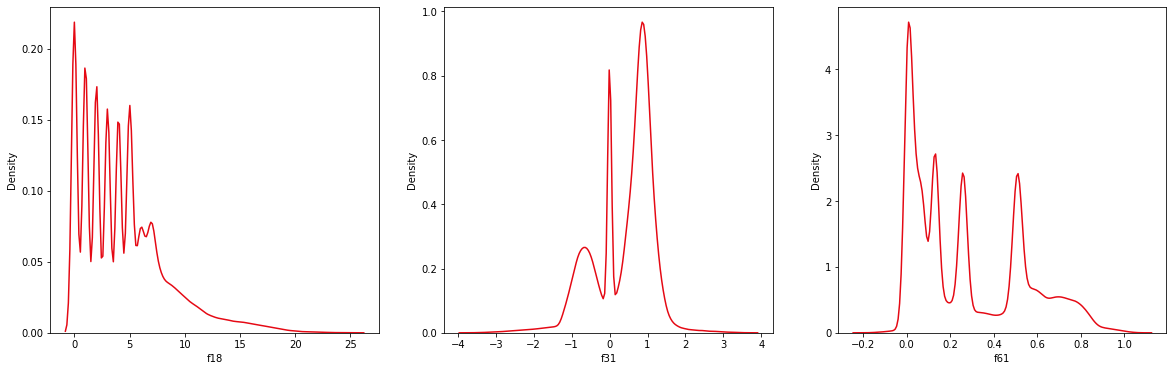

In [41]:
tps_sep = dt.fread("data/train.csv").to_pandas()

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
crazy_features = ["f18", "f31", "f61"]

for ax, f_name in zip(axes.flatten(), crazy_features):
    sns.kdeplot(tps_sep[f_name], ax=ax, color="#E50914")

### 💻Demo

In [43]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer().fit(tps_sep[crazy_features])

tps_sep.loc[:, crazy_features] = qt.transform(tps_sep[crazy_features])

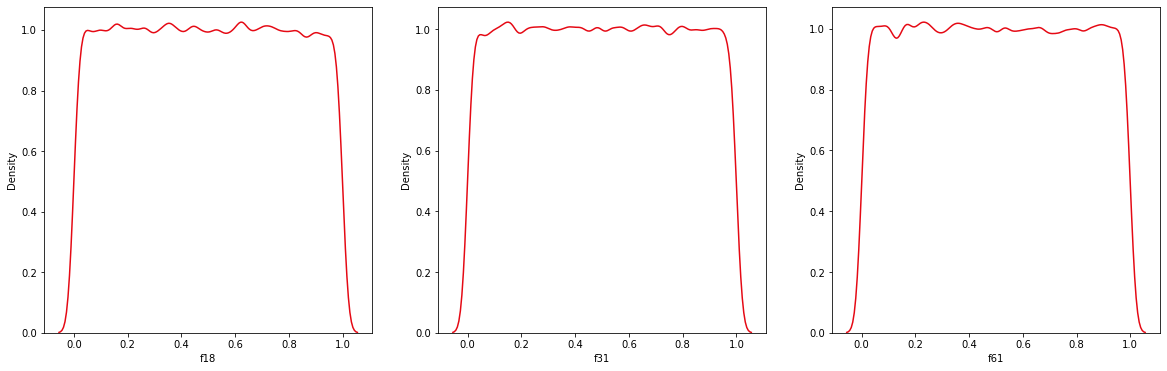

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
crazy_features = ["f18", "f31", "f61"]

for ax, f_name in zip(axes.flatten(), crazy_features):
    sns.kdeplot(tps_sep[f_name], ax=ax, color="#E50914")

### 📚Documentation
**QuantileTransformer** - [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer).

# 9. PCA + tSNE

### 💻Demo

In [59]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tps_october = dt.fread("data/train_oct.csv").to_pandas()
tps_october.shape

(1000000, 287)

In [61]:
X, y = tps_october.drop("target", axis=1), tps_october[["target"]].values.flatten()

In [ ]:
%%time
manifold_pipe = make_pipeline(QuantileTransformer(), PCA(n_components=30), TSNE())

reduced_X = manifold_pipe.fit_transform(X, y)

In [ ]:
%%time
manifold_pipe = make_pipeline(QuantileTransformer(), PCA(n_components=30))

X_pca = manifold_pipe.fit_transform(X, y)
embedding = umap.UMAP(n_components=2).fit(X_pca, y)

In [ ]:
umap.plot.points(embedding, theme="fire");

### 📚Documentation
**PCA** - [link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

**tSNE** - [link](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE).

**UMAP** - [link](https://umap-learn.readthedocs.io/).

# 10. HTML Estimator Representation

In [53]:
cat_pipe = Pipeline(
    steps=[("impute", SimpleImputer(strategy="most_frequent")), ("oh", OneHotEncoder())]
)

num_pipe = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="median")),
        ("transform", QuantileTransformer()),
    ]
)

composed = ColumnTransformer(
    transformers=[
        ("cat_pipe", cat_pipe, make_column_selector(dtype_exclude=np.number)),
        ("num_pipe", num_pipe, make_column_selector(dtype_include=np.number)),
    ]
)

giant_pipeline = make_pipeline(
    composed,
    lgbm.LGBMRegressor(n_estimators=10000, learning_rate=0.01, device_type="gpu"),
)

In [56]:
giant_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oh',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001CD095DEDF0>),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('transform',
                                                                   QuantileTransformer())]),


### 💻Demo

```python
from sklearn import set_config

set_config(display="diagram")
```

![](images/pipeline.png)

### 📚Documentation
**sklearn.set_config** - [link](https://scikit-learn.org/stable/modules/generated/sklearn.set_config.html).

**sklearn.utils.estimator_html_repr** - [link](https://scikit-learn.org/stable/modules/generated/sklearn.utils.estimator_html_repr.html)

# Summary